# Mental Disorder Classifier 

# The Data:  
## This dataset if from Kaggle and downloaded and stored in my GitHub Project folder
    It is combosed of 120 Pyschology Patients with 17 essential Symptoms and can be used for the following conditions: 
    1)Mania Biploar Disorder 
    2) Depressive Bipolar Disorder 
    3) Major Depressive Disorder 
    4) An individual who does not have any of the above but might have another disorder. 
The symptoms in the dataset are the levels of: Sadness, Exhaustness, Euphoric, Sleep Disorder, Mood Swings, Suicidal Ideations, Anorexia, Anxiet, Try-explaining, Nervouse Breakdown, Ingnore/Move-on, Admitting Mistakes, Overthinking, Agressive Response, Optimism, Sexual activity and Concentration.  

This project will flow as follows: 
EDA
    Feature Engineering 
    Discritizing variables 
        Modeling :Random Forest, Support Vector Machine (SVM), Naive Bayes, k-Nearest Neighbors (KNN), Decision Tree,          Gradient Boosting, and Logistic Regression
            Cross Validatation compare performance. 

In [5]:
#Import need Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
#Machine Leraning Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
# Importing the dataset as CSV file from GitHub 
url = 'https://raw.githubusercontent.com/LadyKate7390/Kate_G_DS_Portfolio/refs/heads/main/Mental%20Classifier/Dataset-Mental-Disorders.csv'
df= pd.read_csv(url)

In [8]:
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [21]:
#makeing a copy to use while maintaning orginal downlaod to be called later if needed
df_m =df
df_m.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [22]:
#Dropping Panient Number as it is not needed 
df_m=df_m.drop('Patient Number' , axis=1)

In [23]:
print(df_m.dtypes)# to see what variable types we have 

Sadness                object
Euphoric               object
Exhausted              object
Sleep dissorder        object
Mood Swing             object
Suicidal thoughts      object
Anorxia                object
Authority Respect      object
Try-Explanation        object
Aggressive Response    object
Ignore & Move-On       object
Nervous Break-down     object
Admit Mistakes         object
Overthinking           object
Sexual Activity        object
Concentration          object
Optimisim              object
Expert Diagnose        object
dtype: object


# All of the variables are object
    Next the unique types will be looked at and then a scheme can be devloped to discritize these into intigers for modeling later. 

In [25]:
# Function to iterate throught he dataset and find and print each variable and it unique values 
for column in df_m.columns:
    unique_count =df_m[column].unique()
    unique_value = df_m[column].unique()
    print(f"The number of unique values in {column} : {unique_count}")
    print(f"Unique values in {column}:")
    for  value in unique_value:
          print(value)
    print('\n') 
        

The number of unique values in Sadness : ['Usually' 'Sometimes' 'Seldom' 'Most-Often']
Unique values in Sadness:
Usually
Sometimes
Seldom
Most-Often


The number of unique values in Euphoric : ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Unique values in Euphoric:
Seldom
Most-Often
Usually
Sometimes


The number of unique values in Exhausted : ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Unique values in Exhausted:
Sometimes
Usually
Seldom
Most-Often


The number of unique values in Sleep dissorder : ['Sometimes' 'Most-Often' 'Usually' 'Seldom']
Unique values in Sleep dissorder:
Sometimes
Most-Often
Usually
Seldom


The number of unique values in Mood Swing : ['YES' 'NO']
Unique values in Mood Swing:
YES
NO


The number of unique values in Suicidal thoughts : ['YES ' 'YES' 'NO']
Unique values in Suicidal thoughts:
YES 
YES
NO


The number of unique values in Anorxia : ['NO' 'YES']
Unique values in Anorxia:
NO
YES


The number of unique values in Authority Respect : ['NO' 'YES']
Uniqu

#Create Numeric Values for Object variables and addressing missing data. 

In [27]:
df_m['Suicidal thoughts'] = df_m['Suicidal thoughts'].replace('YES ', "YES") # addressing this binary set as it had three values because of formating error
df_m['Suicidal thoughts'].value_counts()

Suicidal thoughts
NO     63
YES    57
Name: count, dtype: int64

In [28]:
# Missing Data 
mis_data= df_m.isnull().sum()
mis_data

Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [29]:
# Type casting Expert Diagnose from String to Intiger which each diagnosis have distinct value 
mapp_diga = {'Normal': 0, 'Bipolar Type-1': 1, 'Bipolar Type-2': 2, 'Depression': 3} #dictionary for mapping 
df_m['Expert Diagnose'] = df_m['Expert Diagnose'].map(mapp_diga).astype(int)
df_m.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,0


In [31]:
#Casting binary yes and no variable to 1 and 0 respectively 
Y_N_Col = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']
for column in Y_N_Col:
    df_m[column] = df_m[column].map({'YES': 1, 'NO': 0}).astype(int)
    
df_m.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,0


In [32]:
# Correct Spelling 
df_m = df_m.rename(columns={'Optimisim': 'Optimism'})
df_m = df_m.rename(columns={'Anorxia': 'Anorexia'})

In [34]:
#Dropping the " from 10" in the following columns
from_col = ['Sexual Activity', 'Concentration', 'Optimism']
for column in from_col:
   df_m[column] = df_m[column].astype(str).str.extract('(\d)')
   df_m[column] = pd.to_numeric(df_m[column])
    
df_m.head()

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/var/folders/lw/vmbvrc855dqff2_jwv62tbs40000gn/T/ipykernel_69061/2648843446.py:4: SyntaxWarning: invalid escape sequence '\d'
  df_m[column] = df_m[column].astype(str).str.extract('(\d)')


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,0


Only one mor type of data to cast to integer from string the frequency types of "sometimes' 'Seldom', 'Often' etc that is found in three of the variables. After which EDA can be beformed. 

In [35]:
freqcol = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']
for column in freqcol:
    df_m[column] = df_m[column].map({'Seldom': 0, 'Sometimes': 1, 'Usually': 2, 'Most-Often': 3}).astype(int)
    
df_m.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,0


In [49]:
#Pandas Stats 
df_m.describe()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.550000,0.933333,1.633333,1.458333,0.475000,0.475000,0.383333,0.391667,0.475000,0.483333,0.416667,0.516667,0.491667,0.541667,4.741667,4.250000,4.466667,1.525000
std,0.924458,0.923396,1.020243,0.977871,0.501468,0.501468,0.488237,0.490169,0.501468,0.501817,0.495074,0.501817,0.502027,0.500350,2.010459,1.797524,1.991298,1.129903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,0.750000
50%,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,4.000000,4.000000,2.000000
75%,2.000000,1.000000,2.250000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,6.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,8.000000,9.000000,3.000000


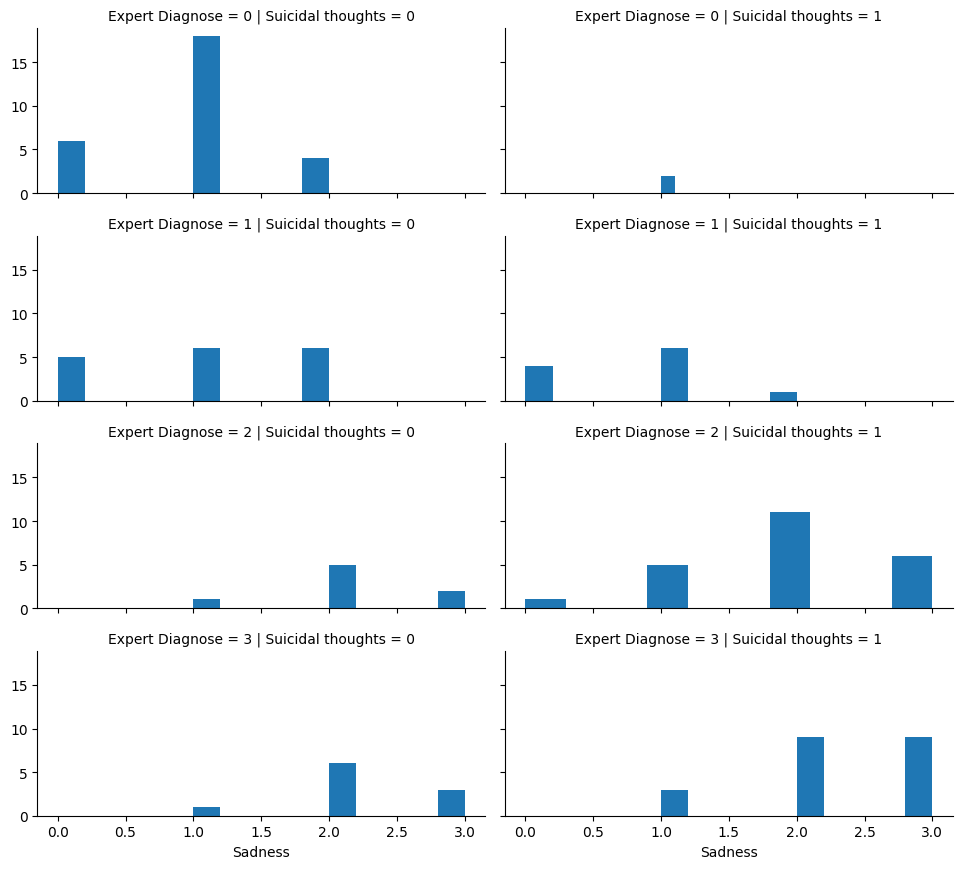

In [50]:
grid = sns.FacetGrid(df_m, col='Suicidal thoughts', row='Expert Diagnose', height=2.2, aspect=2.2)
grid.map(plt.hist, 'Sadness')
grid.add_legend()

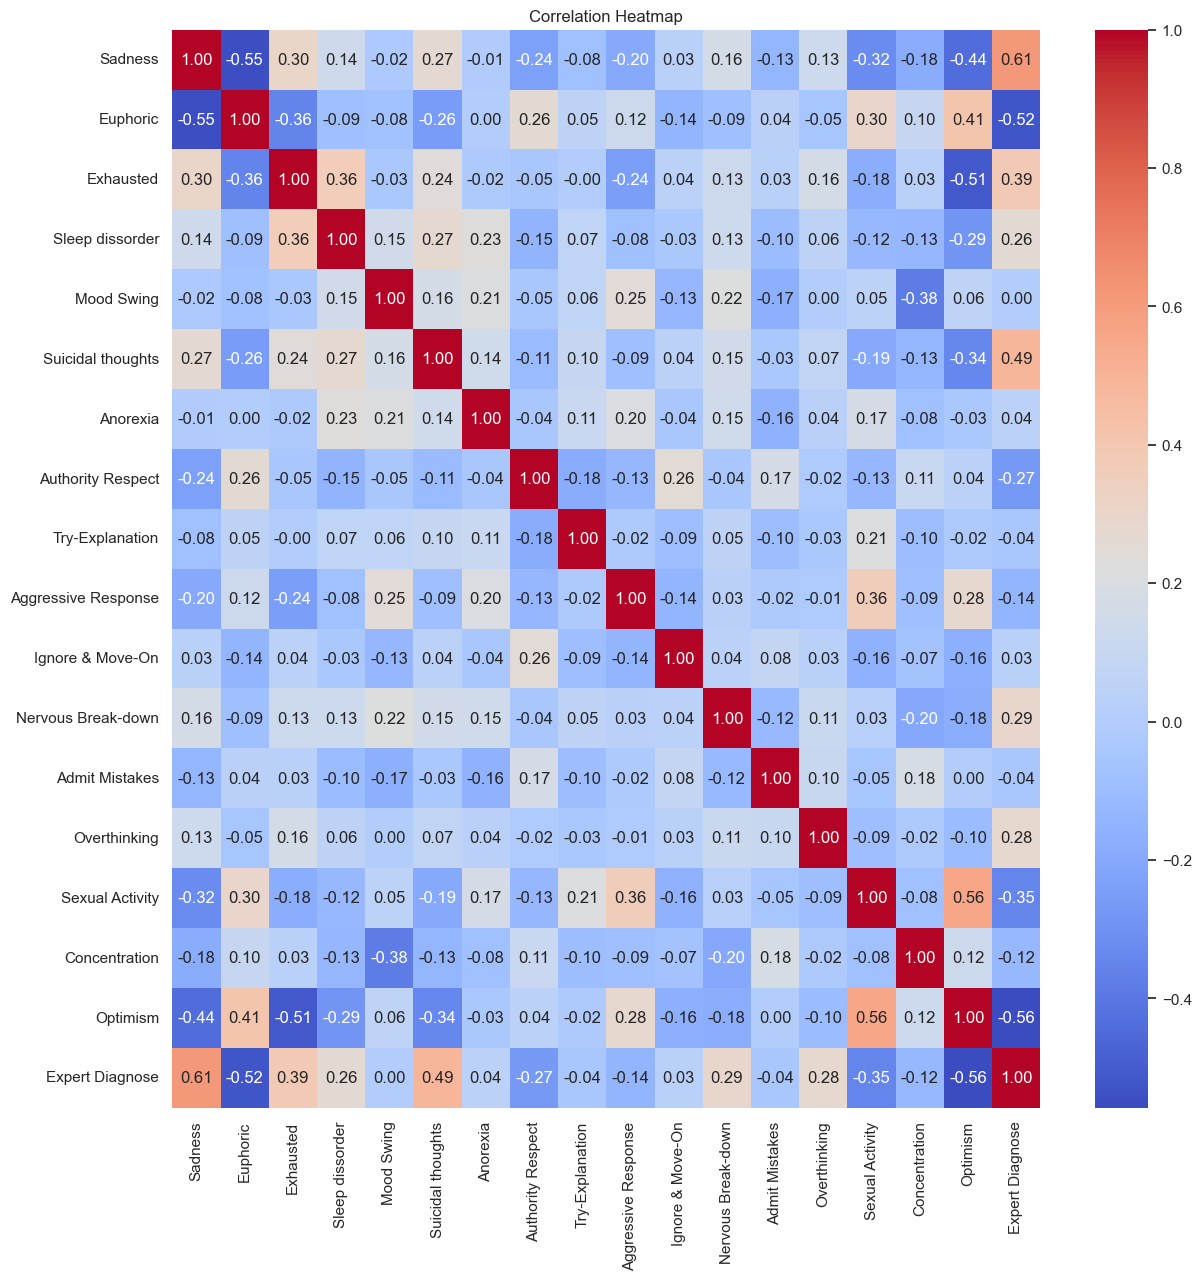

In [51]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

correlation_matrix = df_m.corr()

# create a heatmap
plt.figure(figsize=(14, 14))
heatmap = sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')

plt.title('Correlation Heatmap')
plt.show()

#Modeling 

In [56]:
#Column headers
column_headers = list(df_m.columns)
print(column_headers)

['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing', 'Suicidal thoughts', 'Anorexia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration', 'Optimism', 'Expert Diagnose']


In [55]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])
def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

In [62]:
#Creat a 70% train and 30% test
from sklearn.model_selection import train_test_split

X = df_m.drop(['Expert Diagnose'], axis=1)
y = df_m['Expert Diagnose']

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 0,
                                                    stratify = y)

In [63]:
## Dealing with the imbalance of the data using SVMOTE for oversampling. 
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

oversample = SVMSMOTE(random_state = 42)
oversample = RandomOverSampler(random_state=42)

X_train, y_train = oversample.fit_resample(X_train, y_train)

In [64]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.70      0.78      0.74         9
           2       0.88      0.78      0.82         9
           3       0.90      1.00      0.95         9

    accuracy                           0.83        36
   macro avg       0.84      0.83      0.83        36
weighted avg       0.84      0.83      0.83        36



In [65]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)

In [66]:
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

Random Forest Model
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.89      0.89      0.89         9
           2       1.00      0.89      0.94         9
           3       0.90      1.00      0.95         9

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [67]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
model = GradientBoostingClassifier().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gradient Boosting", y_test, y_predictions)
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))

Gradient Boosting
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.80      0.89      0.84         9
           2       1.00      0.78      0.88         9
           3       1.00      0.89      0.94         9

    accuracy                           0.89        36
   macro avg       0.90      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



{'n_neighbors': 3}


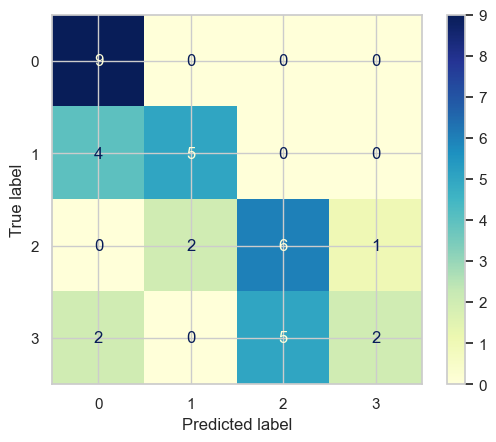

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       1.00      0.33      0.50         9
           2       0.64      1.00      0.78         9
           3       0.75      1.00      0.86         9

    accuracy                           0.75        36
   macro avg       0.81      0.75      0.72        36
weighted avg       0.81      0.75      0.72        36



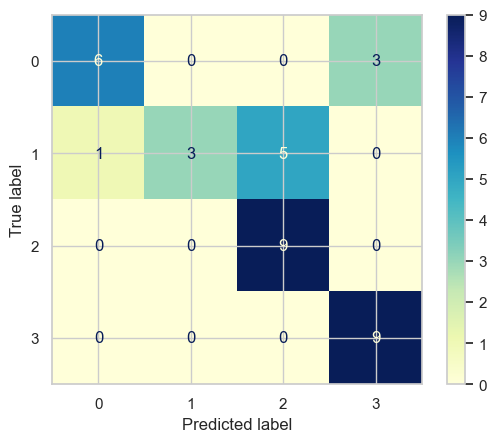

In [69]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
model = GaussianNB().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gaussian Naive Bayes", y_test, y_predictions)
print("Gaussian Naive Bayes\n" + classification_report(y_test, y_predictions))
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

Multi-layer Perceptron
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.82      1.00      0.90         9
           2       1.00      0.89      0.94         9
           3       0.80      0.89      0.84         9

    accuracy                           0.86        36
   macro avg       0.87      0.86      0.86        36
weighted avg       0.87      0.86      0.86        36



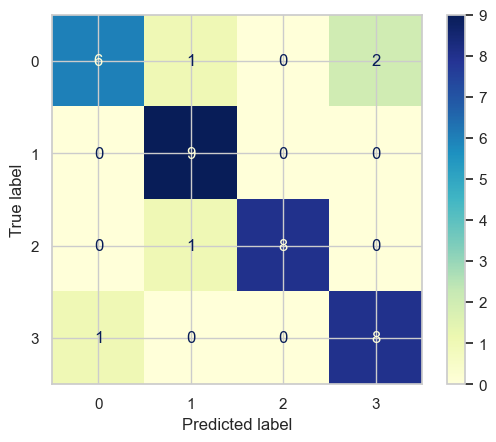

In [71]:
from sklearn.neural_network import MLPClassifier

start = time.time()
model = MLPClassifier(random_state=1, max_iter=600, learning_rate="invscaling").fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Multi-layer Perceptron", y_test, y_predictions)
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [72]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)

y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

# evaluate the model
# calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

# calculate accuracy on the test set
lr_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {lr_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 97.73%
Testing Accuracy: 88.89%
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9
           3       0.80      0.89      0.84         9

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



In [73]:
model_performance

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
Decision Tree,0.833333,0.837500,0.833333,0.832817,0.003964,0.001164
Random Forest,0.916667,0.919444,0.916667,0.916581,0.117701,0.014560
Gradient Boosting,0.888889,0.904545,0.888889,0.889570,0.180286,0.001040
k-NN,0.611111,0.631602,0.611111,0.577083,0.000534,0.001311
Gaussian Naive Bayes,0.750000,0.812500,0.750000,0.722438,0.003948,0.001552
Multi-layer Perceptron,0.861111,0.868831,0.861111,0.858320,0.117705,0.000540


In [74]:
# Graphical represantion of models 
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
model_performance.style.apply(highlight_max, props='color:white;background-color:darkblue;', axis=0)\
         .apply(highlight_max, props='color:white;background-color:red;', axis=1)\
         .apply(highlight_max, props='color:white;background-color:purple', axis=None)

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
Decision Tree,0.833333,0.837500,0.833333,0.832817,0.003964,0.001164
Random Forest,0.916667,0.919444,0.916667,0.916581,0.117701,0.014560
Gradient Boosting,0.888889,0.904545,0.888889,0.889570,0.180286,0.001040
k-NN,0.611111,0.631602,0.611111,0.577083,0.000534,0.001311
Gaussian Naive Bayes,0.750000,0.812500,0.750000,0.722438,0.003948,0.001552
Multi-layer Perceptron,0.861111,0.868831,0.861111,0.858320,0.117705,0.000540
